Ejercicio: Consideramos la base de datos dataset de scikit-learn de cáncer de pecho (Wisconsin Breast Cancer dataset). Tiene registros de métricas clínicas de tumores de cáncer. Las etiquetas son “benign” (benigno sin peligro) o “malignant” (tumor canceroso).  
Nuestro objetivo será construir un modelo para predecir o clasificar (diagnosticar) un nuevo tumor observado, a partir de sus medidas.  
Responder a las cuestiones planteadas en las páginas a continuación:  
```python
import numpy as np
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

print("cancer.keys(): \n{}".format(cancer.keys()))
print("Datos en la base de datos de tumores: {}".format(cancer.data.shape))
print("Número de instancias de cada tipo tumor o etiquetas:\n{}".format({n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))
print("Características de cada tumor: \n{}".format(cancer.feature_names))
```  
```python
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state = 42)
tree = DecisionTreeClassifier(random_state = 0)
tree.fit(X_train, y_train)

print("Precisión en datos de entrenamiento: {:.3f}".format(tree.score(X_train, y_train)))
print("Precisión en datos de test: {:.3f}".format(tree.score(X_test, y_test)))

# Precisión en datos entrenamiento: 1.000
# Precisión en datos de test: 0.937
```
1.  Describir la implementación del modelo de aprendizaje automático del código en Python superior  

```python
tree = DecisionTreeClassifier(max_depth = 4, random_state = 0)
tree.fit(X_train, y_train)
print("Precisión en datos de entrenamiento: {:.3f}".format(tree.score(X_train, y_train)))
print("Precisión en datos de test: {:.3f}".format(tree.score(X_test, y_test)))

# Precisión en datos entrenamiento: 0.988
# Precisión en datos de test: 0.951
```
2. Comentar los resultados del algoritmo modificado (observar los parámetros). ¿A qué se puede deber la
diferencia de precisión sobre cada conjunto de datos, entre los modelos actual y el de la págin anterior?

Podemos gráficar el árbol con valores resultantes del algoritmo de clasificación:

```python
from sklearn.tree import export_graphviz

export_graphviz(tree, out_file = "tree.dot", class_names = ["malignant", "benign"],
feature_names = cancer.feature_names, impurity = False, filled = True)
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)
```
3. Observando los resultados gráficamente del código en la parte superior. ¿Cuál parece ser la característica de los tumores más significativa para el diagnóstico? Justificar la respuesta

```python
import matplotlib.pyplot as plt
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align = 'center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Importancia de la característica")
    plt.ylabel("Característica")

plot_feature_importances_cancer(tree)
```
4. Comentar estos resultados junto a la información obbtenida en los nodos de decisión en el gráfico del árbol

In [1]:
import numpy as np
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

print("cancer.keys(): \n{}".format(cancer.keys()))
print("Datos en la base de datos de tumores: {}".format(cancer.data.shape))
print("Número de instancias de cada tipo tumor o etiquetas:\n{}".format({n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))
print("Características de cada tumor: \n{}".format(cancer.feature_names))

cancer.keys(): 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
Datos en la base de datos de tumores: (569, 30)
Número de instancias de cada tipo tumor o etiquetas:
{'malignant': 212, 'benign': 357}
Características de cada tumor: 
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state = 42)
tree = DecisionTreeClassifier(random_state = 0)
tree.fit(X_train, y_train)

print("Precisión en datos de entrenamiento: {:.3f}".format(tree.score(X_train, y_train)))
print("Precisión en datos de test: {:.3f}".format(tree.score(X_test, y_test)))

# Precisión en datos entrenamiento: 1.000
# Precisión en datos de test: 0.937

Precisión en datos de entrenamiento: 1.000
Precisión en datos de test: 0.937


In [3]:
tree = DecisionTreeClassifier(max_depth = 4, random_state = 0)
tree.fit(X_train, y_train)
print("Precisión en datos de entrenamiento: {:.3f}".format(tree.score(X_train, y_train)))
print("Precisión en datos de test: {:.3f}".format(tree.score(X_test, y_test)))

# Precisión en datos entrenamiento: 0.988
# Precisión en datos de test: 0.951

Precisión en datos de entrenamiento: 0.988
Precisión en datos de test: 0.951


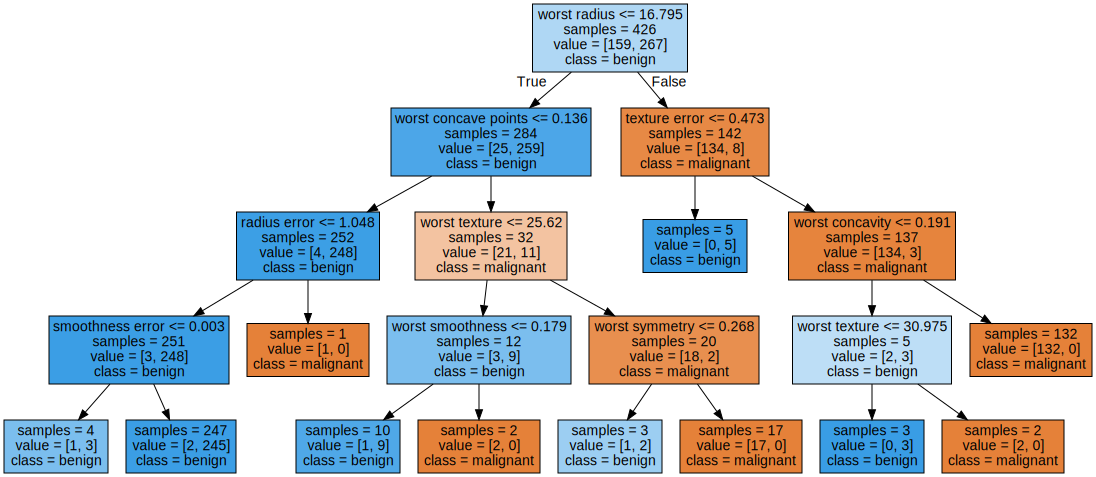

In [4]:
from sklearn.tree import export_graphviz

export_graphviz(tree, out_file = "tree.dot", class_names = ["malignant", "benign"],
feature_names = cancer.feature_names, impurity = False, filled = True)
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

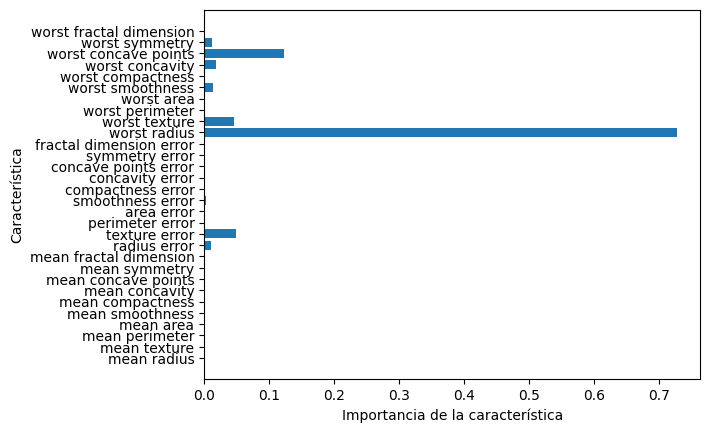

In [5]:
import matplotlib.pyplot as plt
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align = 'center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Importancia de la característica")
    plt.ylabel("Característica")

plot_feature_importances_cancer(tree)

1. En la implementación del modelo de aprendizaje automático en el código superior, se está utilizando un algoritmo de árbol de decisión para clasificar tumores en cáncer benigno o maligno. Se cargan los datos del conjunto de cáncer de pecho utilizando `load_breast_cancer()`. Luego, se dividen los datos en conjuntos de entrenamiento y prueba mediante `train_test_split()`. Se crea una instancia del clasificador de árbol de decisión `DecisionTreeClassifier` y se ajusta (entrena) el modelo con los datos de entrenamiento utilizando `tree.fit()`. Finalmente, se calcula y muestra la precisión del modelo en los conjuntos de entrenamiento y prueba utilizando `tree.score()`.

2. En la implementación modificada del algoritmo, se agrega el parámetro `max_depth = 4` al constructor del clasificador de árbol de decisión. Esto limita la profundidad máxima del árbol a 4 niveles. Los resultados muestran una ligeramente menor precisión en datos de entrenamiento (0.988) y una precisión ligeramente mayor en datos de prueba (0.951) en comparación con el modelo anterior. La diferencia de precisión entre los modelos podría deberse a que el árbol de decisión con profundidad limitada reduce el sobreajuste, lo que puede permitir una mejor generalización a datos no vistos.

3. Observando los resultados gráficamente, la característica más significativa para el diagnóstico parece ser "worst radius". Esta característica tiene una mayor importancia en la clasificación de los tumores como malignos o benignos. La importancia se puede visualizar en la gráfica de barras horizontales generada por la función `plot_feature_importances_cancer()`.

4. Los resultados de la gráfica de barras horizontales se corresponden con la información obtenida en los nodos de decisión en el gráfico del árbol. En el árbol de decisión, los nodos que involucran la característica "worst radius" son más prominentes, lo que indica que esta característica juega un papel crucial en la toma de decisiones del modelo. La coincidencia entre la importancia de la característica y su presencia en los nodos del árbol refuerza la conclusión de que "worst radius" es una característica significativa para el diagnóstico.